**Gibbs sampling example**

In [1]:
using PyPlot,Statistics,DSP

This is the gaussian example used in lecture: the target is a 2d gaussian with $X$ and $Y$ independent.  The variance of $X$ is $2-\epsilon$, and the variance of $Y$ is $\epsilon$.  As explained in class, Gibbs is very good in this case: it gives a new independent sample every 2 steps.

In [2]:
function ex2(eps, nsteps)
    xy = zeros(nsteps,2)
    a  = sqrt(2-eps)
    b  = sqrt(eps)
    for n=2:2:nsteps-1
        xy[n,1] = a*randn()
        xy[n,2] = xy[n-1,2]
        xy[n+1,1] = xy[n,1]
        xy[n+1,2] = b*randn()
    end
    return xy
end

ex2 (generic function with 1 method)

In [3]:
nsteps=100000
eps=0.01

0.01

In [4]:
xy2=ex2(eps,nsteps)

100000×2 Array{Float64,2}:
  0.0        0.0        
 -1.91548    0.0        
 -1.91548   -0.0205788  
 -0.932387  -0.0205788  
 -0.932387  -0.0178694  
 -0.469218  -0.0178694  
 -0.469218  -0.0323349  
 -1.13707   -0.0323349  
 -1.13707   -0.124177   
 -0.45027   -0.124177   
 -0.45027   -0.0849035  
  1.09367   -0.0849035  
  1.09367    0.202937   
  ⋮                     
 -2.04795   -0.0687372  
 -0.369111  -0.0687372  
 -0.369111  -0.0291763  
  2.18885   -0.0291763  
  2.18885    0.0677536  
  0.104745   0.0677536  
  0.104745   0.000224564
 -0.452969   0.000224564
 -0.452969   0.0401221  
 -2.25727    0.0401221  
 -2.25727    0.0341236  
  0.0        0.0        

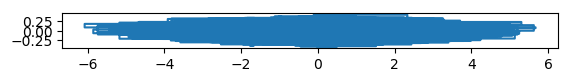

(-6.6618908226872, 6.2577395926953745, -0.4569019605180664, 0.4587139749006099)

In [5]:
plot(xy2[:,1],xy2[:,2])
axis(:image)

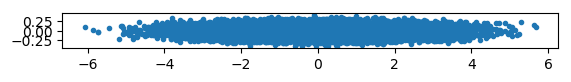

(-6.6618908226872, 6.2577395926953745, -0.4569019605180664, 0.4587139749006099)

In [6]:
plot(xy2[1:2:end,1],xy2[1:2:end,2],".")
axis(:image)

*Autocorrelation functions.*

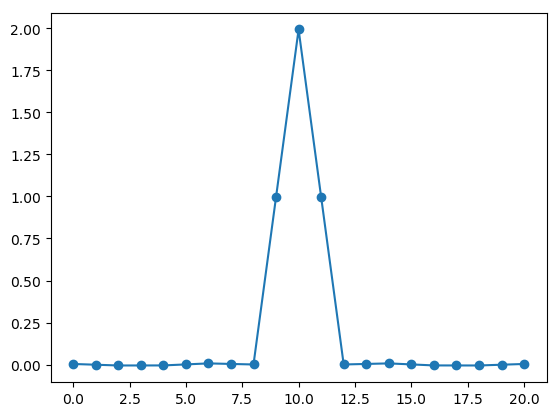

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x00000000335BEE10>

In [7]:
plot((conv(xy2[:,1],xy2[end:-1:1,1])/nsteps)[nsteps-10:nsteps+10],"o-")

Let's now rotate the gaussian by $45^\circ$, so the covariance matrix is
$$
\left(\begin{array}{cc}
1 & 1-\epsilon\\
1-\epsilon & 1\\
\end{array}\right).
$$
The conditional densities are still gaussian.

In [8]:
function ex3(eps, nsteps)
    xy = zeros(nsteps,2)
    b  = sqrt((2-eps)*eps)
    a  = 1-eps
    for n=2:2:nsteps-1
        xy[n,1] = a*xy[n-1,2] + b*randn()
        xy[n,2] = xy[n-1,2]
        xy[n+1,1] = xy[n,1]
        xy[n+1,2] = a*xy[n,1] + b*randn()
    end
    return xy
end

ex3 (generic function with 1 method)

In [9]:
xy3=ex3(eps,nsteps)

100000×2 Array{Float64,2}:
  0.0          0.0       
 -0.0465219    0.0       
 -0.0465219   -0.0482655 
 -0.0153417   -0.0482655 
 -0.0153417    0.167682  
  0.352194     0.167682  
  0.352194     0.486411  
  0.552072     0.486411  
  0.552072     0.360427  
  0.00331015   0.360427  
  0.00331015  -0.017233  
 -0.0500497   -0.017233  
 -0.0500497    0.00756759
  ⋮                      
 -0.271587    -0.386425  
 -0.419205    -0.386425  
 -0.419205    -0.45864   
 -0.270961    -0.45864   
 -0.270961    -0.269788  
 -0.376562    -0.269788  
 -0.376562    -0.479403  
 -0.47652     -0.479403  
 -0.47652     -0.517546  
 -0.620732    -0.517546  
 -0.620732    -0.501341  
  0.0          0.0       

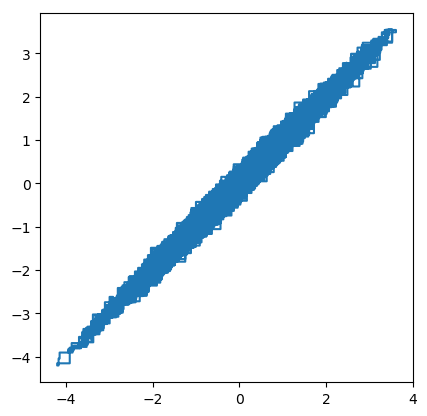

(-4.59696390476549, 4.002292459269961, -4.593768973096392, 3.934670808518628)

In [10]:
plot(xy3[:,1],xy3[:,2])
axis(:image)

Let's double-check we really got the covariances we should get.

In [11]:
[cov(xy2[:,i],xy2[:,j]) for i=1:2,j=1:2]

2×2 Array{Float64,2}:
  1.99318     -0.00036696
 -0.00036696   0.0100664 

In [12]:
[cov(xy3[:,i],xy3[:,j]) for i=1:2,j=1:2]

2×2 Array{Float64,2}:
 0.954427  0.944282
 0.944282  0.954133

Let's compare the autocorrelation functions.

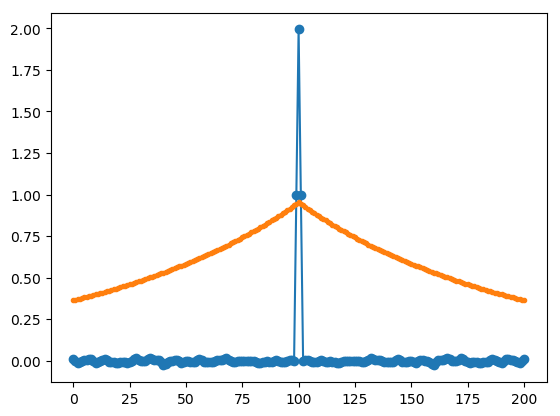

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x000000002DEC9DA0>

In [13]:
plot((conv(xy2[:,1],xy2[end:-1:1,1])/nsteps)[nsteps-100:nsteps+100],"o-")
plot((conv(xy3[:,1],xy3[end:-1:1,1])/nsteps)[nsteps-100:nsteps+100],".-")